# 1. Data Exploration & PreProcessing

In [1]:
def generate_word_cloud(file, column):
    import nltk
    import pandas as pd
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    from nltk.corpus import stopwords 
    try:
        nltk.data.find('/Users/maddenri/nltk_data/')
    except LookupError:
        nltk.download('stopwords')
    
    stopwords = nltk.corpus.stopwords.words('english')
    df = pd.read_csv(file)
    comment_words = ''
    for val in df[column]:
        val = str(val)
        tokens = val.split()
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()  
        comment_words += " ".join(tokens)+" "
    wordcloud = WordCloud(width = 400, height = 400, stopwords=stopwords,
                background_color ='white',
                min_font_size = 10).generate(comment_words)                  
    plt.figure(figsize = (6, 6), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [2]:
def generate_word_frequency(file, text_column):
    import nltk
    import pandas as pd
    import matplotlib.pyplot as plt
    from nltk.probability import FreqDist
    try:
        nltk.data.find('/Users/maddenri/nltk_data/')
    except LookupError:
        nltk.download('stopwords')
    
    stopwords = nltk.corpus.stopwords.words('english')
    df= pd.read_csv(file)
    df_string = ' '.join(df[text_column].dropna())
    mostcommon_small = FreqDist([word for word in df_string.split() 
                                 if word not in stopwords]).most_common(25)
    x, y = zip(*mostcommon_small)
    plt.figure(figsize=(10,6))
    plt.margins(0.02)
    plt.bar(x, y)
    plt.xlabel('Words', fontsize=20)
    plt.ylabel('Frequency of Words', fontsize=20)
    plt.yticks(fontsize=16)
    plt.xticks(rotation=60, fontsize=16)
    plt.title('Frequency of 25 Most Common Words', fontsize=20)
    plt.show()

In [3]:
def preprocess_text_column(input_file, output_file):
    '''(i)   merge "title" and "text" into a single "news_content" column
       (ii)  convert all words to lowercase
       (iii) removed all unlabelled instances'''
    import re
    import nltk
    import pandas as pd
    import numpy as np

    df=pd.read_csv(input_file)
    df['news_content'] = np.where(df['title'].isnull(), df['text'], 
                              np.where(df['text'].isnull(), df['title'], 
                                           df['title'] + '. ' +  df['text']))
    df['news_content'] = df['news_content'].str.lower()
    df['title'] = df['title'].str.lower().fillna('')
    df['text'] = df['text'].str.lower().fillna('')
    df = df[['title','text','news_content','label']].dropna().reset_index(drop=True)
    df.to_csv(output_file, index=False)

In [4]:
preprocess_text_column('../Datasets/Original/dataset_i.csv', '../Datasets/Preprocessed/dataset_i.csv')
preprocess_text_column('../Datasets/Original/dataset_ii.csv', '../Datasets/Preprocessed/dataset_ii.csv')

In [5]:
generate_word_cloud('../Datasets/Preprocessed/dataset_i.csv', 'news_content')

<Figure size 600x600 with 1 Axes>

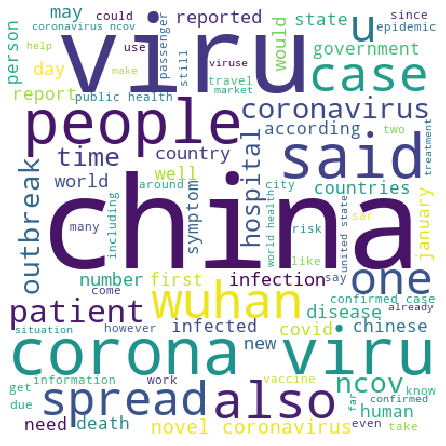

In [6]:
generate_word_cloud('../Datasets/Preprocessed/dataset_i.csv', 'news_content')

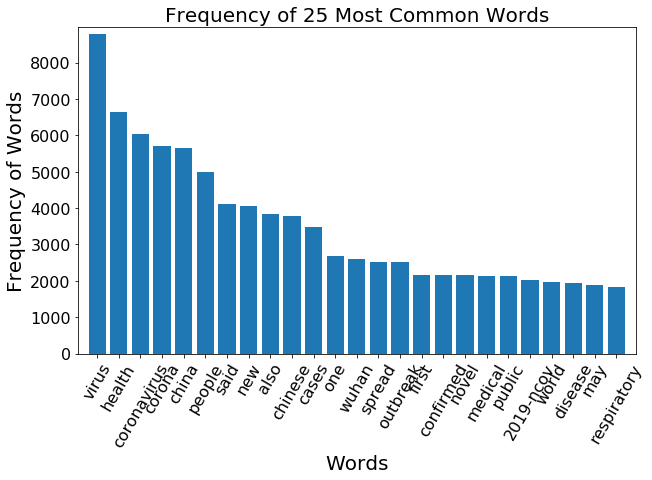

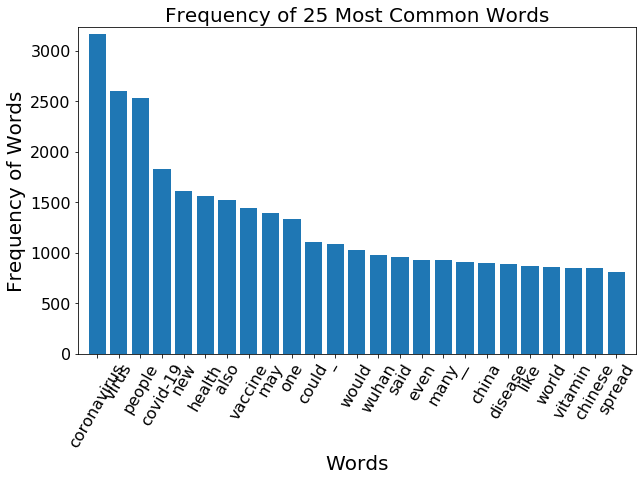

In [7]:
generate_word_frequency('../Datasets/Preprocessed/dataset_i.csv', 'news_content')
generate_word_frequency('../Datasets/Preprocessed/dataset_ii.csv', 'news_content')

# 2. Bag of Words

In [8]:
import pandas as pd
from nltk.tokenize import word_tokenize
df= pd.read_csv('../Datasets/Preprocessed/dataset_i.csv')

In [9]:
bow = pd.Series([' '.join(['"{}"'.format(word) for word in word_tokenize(doc)]) for doc in df['news_content'][0:5]])
bow

0    "facebook" "deletes" "michigan" "anti-lockdown...
1    "other" "viewpoints" ":" "covid-19" "is" "wors...
2    "bermuda" "'s" "covid-19" "cases" "surpass" "1...
3    "purdue" "university" "says" "students" "face"...
4    "the" "high" "cost" "of" "locking" "down" "ame...
dtype: object

In [10]:
bow[0]

'"facebook" "deletes" "michigan" "anti-lockdown" "group" "with" "380,000" "members" "." "facebook" "has" "shuttered" "a" "popular" "group" "for" "michiganders" "who" "oppose" "their" "governor" "’" "s" "extreme" "lockdown" "measures" "," "fueling" "debate" "about" "free" "speech" "during" "the" "coronavirus" "crisis" "." "‘" "michiganders" "against" "excessive" "quarantine" "’" "had" "more" "than" "380,000" "members" "," "with" "media" "reports" "describing" "it" "as" "one" "of" "the" "largest" "anti-lockdown" "groups" "in" "the" "nation" "." "it" "’" "s" "not" "clear" "if" "facebook" "has" "provided" "an" "explanation" "for" "the" "group" "’" "s" "removal" "." "visiting" "the" "page" "gives" "the" "following" "message" ":" "“" "sorry" "," "this" "content" "isn" "’" "t" "available" "right" "now." "”" "garrett" "soldano" "of" "mattawan" "," "michigan" "created" "michiganders" "against" "excessive" "quarantine" "in" "april" "after" "becoming" "disenchanted" "with" "governor" "gretchen" "

In [11]:
def generate_bag_of_words(series):
    import pandas as pd
    from nltk.tokenize import word_tokenize
    return pd.Series([' '.join(['"{}"'.format(word) for word in word_tokenize(doc)]) for doc in series]) 

# 3. POS Tags

In [12]:
from nltk import pos_tag
pos_list = [pos_tag(word_tokenize(doc)) for doc in df['news_content'][0:5]]
pos_list[0]

[('facebook', 'NN'),
 ('deletes', 'VBZ'),
 ('michigan', 'JJ'),
 ('anti-lockdown', 'JJ'),
 ('group', 'NN'),
 ('with', 'IN'),
 ('380,000', 'CD'),
 ('members', 'NNS'),
 ('.', '.'),
 ('facebook', 'NN'),
 ('has', 'VBZ'),
 ('shuttered', 'VBN'),
 ('a', 'DT'),
 ('popular', 'JJ'),
 ('group', 'NN'),
 ('for', 'IN'),
 ('michiganders', 'NNS'),
 ('who', 'WP'),
 ('oppose', 'VBP'),
 ('their', 'PRP$'),
 ('governor', 'NN'),
 ('’', 'NNP'),
 ('s', 'VBD'),
 ('extreme', 'JJ'),
 ('lockdown', 'JJ'),
 ('measures', 'NNS'),
 (',', ','),
 ('fueling', 'VBG'),
 ('debate', 'NN'),
 ('about', 'IN'),
 ('free', 'JJ'),
 ('speech', 'NN'),
 ('during', 'IN'),
 ('the', 'DT'),
 ('coronavirus', 'NN'),
 ('crisis', 'NN'),
 ('.', '.'),
 ('‘', 'JJ'),
 ('michiganders', 'NNS'),
 ('against', 'IN'),
 ('excessive', 'JJ'),
 ('quarantine', 'NN'),
 ('’', 'NN'),
 ('had', 'VBD'),
 ('more', 'JJR'),
 ('than', 'IN'),
 ('380,000', 'CD'),
 ('members', 'NNS'),
 (',', ','),
 ('with', 'IN'),
 ('media', 'NNS'),
 ('reports', 'NNS'),
 ('describing', '

In [13]:
pos = pd.Series([' '.join([tag[1] for tag in doc]) for doc in pos_list])
pos

0    NN VBZ JJ JJ NN IN CD NNS . NN VBZ VBN DT JJ N...
1    JJ NNS : NN VBZ JJR IN DT NN . PRP MD RB RB VB...
2    NN POS JJ NNS VBP CD DT NN IN NN IN NN VBZ VBN...
3    JJ NN VBZ NNS VBP CD TO CD JJ NN '' IN JJ IN D...
4    DT JJ NN IN VBG RP NNS : NN PRP VBP RB VBN DT ...
dtype: object

In [14]:
pos[0]

"NN VBZ JJ JJ NN IN CD NNS . NN VBZ VBN DT JJ NN IN NNS WP VBP PRP$ NN NNP VBD JJ JJ NNS , VBG NN IN JJ NN IN DT NN NN . JJ NNS IN JJ NN NN VBD JJR IN CD NNS , IN NNS NNS VBG PRP IN CD IN DT JJS JJ NNS IN DT NN . PRP VBD PRP RB JJ IN NN VBZ VBN DT NN IN DT NN NNP VBZ NN . VBG DT NN VBZ DT JJ NN : NN NN , DT NN NN NNP NN JJ JJ NN NNP NN NN IN NN , RB VBD NNS IN JJ NN IN NN IN VBG VBN IN NN NN VBD NNP VBD JJ NN VBD DT NN WDT PRP RB VBD . DT NN VBD NNS IN DT NN IN VBG JJ NN NN NNP , DT NN IN WDT NNS IN NNS VBN JJ NN IN DT NN , VBG . NNS VBD VBN TO VB IN PRP$ NNS CC RB TO JJ NN NNS . RB , JJ CD NNS VBD RP VBG IN DT NN NN . JJ NNS IN DT NN VBD DT NN TO VB IN DT NN CC JJ NNS IN PRP VBD VBG IN DT NN IN DT NN NNP NN NN NNS , RB VBN IN NN CD , WDT VBP VBN DT NNP JJ NN NNS CC TO VB JJ . NN RB VBD PRP NN NNS IN MD , IN DT NN VBD TO VB PRP VB . DT NN VBZ VBN DT JJ NNS IN DT JJ NN IN DT NN NNP VBD JJ . NN PRP MD RB VB PRP , '' NN VBD IN DT NN NN IN DT NN VBD VBN . VB DT RB VBZ TO DT IN PRP IN RB IN

In [15]:
def generate_part_of_speech_tags(series):
    '''Uses Penn Treebank tagset - https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html'''
    import pandas as pd
    from nltk import pos_tag
    from nltk.tokenize import word_tokenize
    pos_list = [pos_tag(word_tokenize(doc)) for doc in series]
    return pd.Series([' '.join([tag[1] for tag in doc]) for doc in pos_list])

# 4. Standford Core NLP server

### 4.1 - CFG Production Rules  -> File

In [16]:
def news_content_to_files(file, output):
    import os
    import pandas as pd
    from os.path import join

    if not os.path.exists(output):
        os.makedirs(output)
    series= pd.read_csv(file)['news_content']
    for count, value in enumerate(series):
        with open(join(output,f'file_{count}'), 'w') as text_file:
            text_file.write(value)

In [17]:
news_content_to_files('../Datasets/Preprocessed/dataset_i.csv', '../Datasets/news_content_files/dataset_i')
news_content_to_files('../Datasets/Preprocessed/dataset_ii.csv', '../Datasets/news_content_files/dataset_ii')

In [18]:
def generate_cfg_parse_docs(path):
    import glob
    import os
    from os.path import join
    from xml import etree
    from nltk import Tree
    from corenlp_xml.document import Document

    new_cfg_trees = list()
    for root, dirs, files in os.walk(path):
        for name in files:
            if name.endswith('.xml'):
                file = join(root, name)          
                et_root = etree.ElementTree.parse(file).getroot()
                xmlstr = etree.ElementTree.tostring(et_root, encoding='unicode', method='xml')
                doc = Document(xmlstr)
                sentences = [' '.join([w.word for w in sentence.tokens]) for sentence in list(doc.sentences)]
                parse_trees = [Tree.fromstring(sentence.parse_string) for sentence in list(doc.sentences)]
                with open(file.replace('.xml','.parse'),'w') as f:  
                    parse_doc_string = ' '.join([str(rule).replace(' ', '') for sentence in parse_trees for rule in sentence.productions()])
                    f.write(parse_doc_string)

In [18]:
generate_cfg_parse_docs('../Datasets/news_content_files/dataset_i')
generate_cfg_parse_docs('../Datasets/news_content_files/dataset_ii')

### 4.2 - Discourse Rhetorical Relationships  -> File

In [19]:
%%sh
cd "../RR_DPLP_Parser"
/Library/Frameworks/Python.framework/Versions/2.7/bin/python convert.py ../Datasets/news_content_files/dataset_i
/Library/Frameworks/Python.framework/Versions/2.7/bin/python convert.py ../Datasets/news_content_files/dataset_ii

Processing file: ../Datasets/news_content_files/dataset_i/file_79.xml
Processing file: ../Datasets/news_content_files/dataset_i/file_1976.xml
Processing file: ../Datasets/news_content_files/dataset_i/file_788.xml
Processing file: ../Datasets/news_content_files/dataset_i/file_950.xml
Processing file: ../Datasets/news_content_files/dataset_i/file_944.xml
Processing file: ../Datasets/news_content_files/dataset_i/file_1962.xml
Processing file: ../Datasets/news_content_files/dataset_i/file_45.xml
Processing file: ../Datasets/news_content_files/dataset_i/file_1792.xml
Processing file: ../Datasets/news_content_files/dataset_i/file_1786.xml
Processing file: ../Datasets/news_content_files/dataset_i/file_978.xml
Processing file: ../Datasets/news_content_files/dataset_i/file_51.xml
Processing file: ../Datasets/news_content_files/dataset_i/file_2502.xml
Processing file: ../Datasets/news_content_files/dataset_i/file_993.xml
Processing file: ../Datasets/news_content_files/dataset_i/file_2264.xml
Pro

In [20]:
%%sh
cd "../RR_DPLP_Parser"
/Library/Frameworks/Python.framework/Versions/2.7/bin/python segmenter.py ../Datasets/news_content_files/dataset_i/
/Library/Frameworks/Python.framework/Versions/2.7/bin/python segmenter.py ../Datasets/news_content_files/dataset_ii/

Load model from: discoseg/pretrained/model.pickle.gz
Processing file: ../Datasets/news_content_files/dataset_i/file_739.conll
Processing file: ../Datasets/news_content_files/dataset_i/file_1668.conll
Processing file: ../Datasets/news_content_files/dataset_i/file_1145.conll
Processing file: ../Datasets/news_content_files/dataset_i/file_1906.conll
Processing file: ../Datasets/news_content_files/dataset_i/file_1594.conll
Processing file: ../Datasets/news_content_files/dataset_i/file_1100.conll
Processing file: ../Datasets/news_content_files/dataset_i/file_1943.conll
Processing file: ../Datasets/news_content_files/dataset_i/file_857.conll
Processing file: ../Datasets/news_content_files/dataset_i/file_2233.conll
Processing file: ../Datasets/news_content_files/dataset_i/file_480.conll
Processing file: ../Datasets/news_content_files/dataset_i/file_812.conll
Processing file: ../Datasets/news_content_files/dataset_i/file_2276.conll
Processing file: ../Datasets/news_content_files/dataset_i/file_

In [21]:
%%sh
cd "../RR_DPLP_Parser"
/Library/Frameworks/Python.framework/Versions/2.7/bin/python rstparser.py ../Datasets/news_content_files/dataset_i
/Library/Frameworks/Python.framework/Versions/2.7/bin/python rstparser.py ../Datasets/news_content_files/dataset_ii

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# 5. CFG Production Rules

1. Run the following from a separate shell:

java -Xmx1024M -cp "/Users/maddenri/Documents/MSc Software Dev/Thesis/StandfordParser/stanford-corenlp-4.5.2/*" edu.stanford.nlp.pipeline.StanfordCoreNLPServer -port 9000 -timeout 1500000

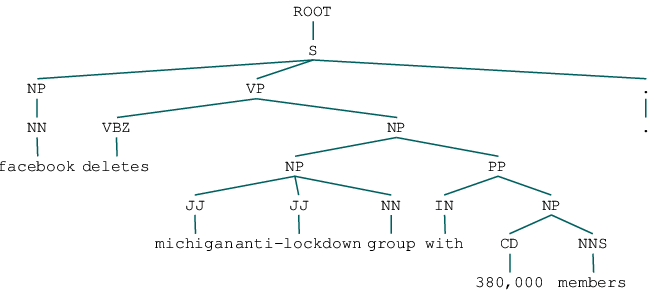

In [19]:
from nltk.parse import CoreNLPParser
parser = CoreNLPParser(url='http://localhost:9000')
parser.session.trust_env = False

cfg_trees = [list(parser.parse_text(doc)) for doc in df['news_content'][0:1]]
cfg_trees[0][0]

In [20]:
cfg_trees[0][0].productions()

[ROOT -> S,
 S -> NP VP .,
 NP -> NN,
 NN -> 'facebook',
 VP -> VBZ NP,
 VBZ -> 'deletes',
 NP -> NP PP,
 NP -> JJ JJ NN,
 JJ -> 'michigan',
 JJ -> 'anti-lockdown',
 NN -> 'group',
 PP -> IN NP,
 IN -> 'with',
 NP -> CD NNS,
 CD -> '380,000',
 NNS -> 'members',
 . -> '.']

In [21]:
production_rules = pd.Series([' '.join([str(rule).replace(' ', '') for sentence in doc 
           for rule in sentence.productions()]) for doc in cfg_trees])
production_rules

0    ROOT->S S->NPVP. NP->NN NN->'facebook' VP->VBZ...
dtype: object

In [22]:
production_rules[0]

"ROOT->S S->NPVP. NP->NN NN->'facebook' VP->VBZNP VBZ->'deletes' NP->NPPP NP->JJJJNN JJ->'michigan' JJ->'anti-lockdown' NN->'group' PP->INNP IN->'with' NP->CDNNS CD->'380,000' NNS->'members' .->'.' ROOT->S S->NPVP. NP->NN NN->'facebook' VP->VBZVP VBZ->'has' VP->VBNNPPP VBN->'shuttered' NP->DTJJNN DT->'a' JJ->'popular' NN->'group' PP->INNP IN->'for' NP->NPSBAR NP->NNS NNS->'michiganders' SBAR->WHNPS WHNP->WP WP->'who' S->VP VP->VBPNP,S VBP->'oppose' NP->NPJJNNNNS NP->PRP$NNPOS PRP$->'their' NN->'governor' POS->'’s' JJ->'extreme' NN->'lockdown' NNS->'measures' ,->',' S->VP VP->VBGNPPPPP VBG->'fueling' NP->NN NN->'debate' PP->INNP IN->'about' NP->JJNN JJ->'free' NN->'speech' PP->INNP IN->'during' NP->DTNNNN DT->'the' NN->'coronavirus' NN->'crisis' .->'.' ROOT->S S->NPVP. NP->``NPPP'' ``->'‘' NP->NNS NNS->'michiganders' PP->INNP IN->'against' NP->JJNN JJ->'excessive' NN->'quarantine' ''->'’' VP->VBDNP,PP VBD->'had' NP->QPNNS QP->JJRINCD JJR->'more' IN->'than' CD->'380,000' NNS->'members' ,

In [23]:
def generate_cfg_productions(path):
    import os
    from os.path import join
    import pandas as pd
    
    production_rules = list()
    files = sorted([name for name in os.listdir(path) 
                     if os.path.isfile(join(path,name)) and name.endswith('.parse')]
                   ,key=lambda x: int(x.split('_')[-1].split('.')[0]), reverse=False)
    
    for file in files:
        with open(join(path,file), 'r') as f:
                    production_rules.append(f.read())
    return pd.Series(production_rules)

# 6. Discourse - Rhetorical Relationships

In [24]:
def generate_rhetorical_relationships(path):
    import os
    from os.path import join, isfile, basename, dirname
    import pandas as pd

    rhetorical_relationships = list()
    if isfile(path):
        files = [basename(path) if path.endswith('.brackets') else None]
        path = dirname(path)
    else:
        files = sorted([name for name in os.listdir(path) 
                    if os.path.isfile(join(path,name)) and name.endswith('.brackets')]
                   ,key=lambda x: int(x.split('_')[-1].split('.')[0]), reverse=False)

    for file in files:
        with open(join(path,file), 'r') as f:
            doc = ' '.join([' '.join([rr.replace(' ', '').lower() 
                      for rr in rule[1:-2].replace("'","").rsplit(',',2)]) 
                          for rule in f.readlines()])
            rhetorical_relationships.append(doc)
    return pd.Series(rhetorical_relationships)

In [25]:
rewrite_rules = generate_rhetorical_relationships('../Datasets/news_content_files/dataset_i/file_0.brackets')
rewrite_rules

0    (1,1) nucleus span (2,2) nucleus span (3,3) sa...
dtype: object

In [26]:
rewrite_rules[0]

'(1,1) nucleus span (2,2) nucleus span (3,3) satellite elaboration (2,3) nucleus span (4,4) nucleus span (5,5) satellite elaboration (4,5) nucleus span (6,6) nucleus span (7,7) nucleus span (8,8) nucleus span (9,9) satellite elaboration (8,9) nucleus span (10,10) nucleus span (11,11) nucleus span (12,12) satellite elaboration (11,12) satellite elaboration (10,12) nucleus span (13,13) nucleus span (14,14) satellite attribution (15,15) nucleus span (16,16) nucleus span (17,17) nucleus span (18,18) satellite elaboration (17,18) satellite elaboration (16,18) satellite elaboration (15,18) nucleus span (14,18) satellite circumstance (13,18) nucleus span (19,19) nucleus span (20,20) nucleus list (21,21) nucleus list (20,21) satellite purpose (19,21) nucleus span (22,22) nucleus span (23,23) satellite elaboration (22,23) nucleus same_unit (24,24) nucleus same_unit (22,24) nucleus span (25,25) nucleus span (26,26) nucleus span (27,27) nucleus span (28,28) nucleus span (29,29) nucleus list (30,3

# 7. Semantic Features

## LIWC Analysis

In [27]:
def perform_liwc(in_file, out_file, col):
    import subprocess
    cmd = ["/Applications/LIWC-22.app/Contents/MacOS/LIWC-22-cli",
                  "--mode", "wc",
                  "--input", in_file,
                  "--column-indices", col,
                  "--output", out_file]
    subprocess.call(cmd)

In [2]:
perform_liwc('../Datasets/Preprocessed/dataset_i.csv', '../Datasets/LIWC/dataset_i_title.csv', '1')
perform_liwc('../Datasets/Preprocessed/dataset_i.csv', '../Datasets/LIWC/dataset_i_text.csv', '2')
perform_liwc('../Datasets/Preprocessed/dataset_ii.csv', '../Datasets/LIWC/dataset_ii_title.csv', '1')
perform_liwc('../Datasets/Preprocessed/dataset_ii.csv', '../Datasets/LIWC/dataset_ii_text.csv', '2')

# 7.1 Disinformation-related Attributes (DIAs)

### Quality - Informality

In [28]:
def get_informality_features(liwc_file):
    import pandas as pd
    df = pd.read_csv(liwc_file)[['WC','swear','netspeak','assent','nonflu','filler', 'Conversation']]
    df.loc[df['WC']==0, :] = None
    return df.drop(['WC'], axis=1)

In [29]:
q_inform_dataset_i = get_informality_features('../Datasets/LIWC/dataset_i_text.csv')
q_inform_dataset_ii = get_informality_features('../Datasets/LIWC/dataset_ii_text.csv')

In [30]:
q_inform_dataset_ii[308:]

,swear,netspeak,assent,nonflu,filler,Conversation
308,0.0,0.17,0.08,0.0,0.0,0.25
309,NaN,NaN,NaN,NaN,NaN,NaN
310,0.0,0.00,0.00,0.0,0.0,0.00
311,0.0,0.00,0.00,0.0,0.0,0.00
312,0.0,0.00,0.08,0.0,0.0,0.08
...,...,...,...,...,...,...
1154,0.0,0.10,0.00,0.0,0.0,0.10
1155,0.0,0.00,0.00,0.0,0.0,0.00
1156,0.0,0.00,0.00,0.0,0.0,0.00
1157,0.0,0.00,0.04,0.0,0.0,0.04


### Quality - Diversity

In [31]:
def get_diversity_features(file):
    import pandas as pd
    import numpy as np
    from nltk import pos_tag
    from nltk.tokenize import word_tokenize
    div_features = list()
    columns=['#unique_words', '%unique_words', '#unique_content_words', '%unique_content_words',
             '#unique_nouns', '%unique_nouns', '#unique_verbs', '%unique_verbs',
             '#unique_adjectives', '%unique_adjectives', '#unique_adverbs', '%unique_adverbs']
    df= pd.read_csv(file)[['text','label']]
    bow_list = [word_tokenize(doc) if not pd.isnull(doc) else None for doc in df['text']] 
    pos_list = [pos_tag(doc) if doc is not None else None for doc in bow_list] 
    for bow, pos in zip(bow_list, pos_list):
        unique_words_t = len(set(bow)) if bow is not None else np.nan
        unique_words_f = (unique_words_t / len(bow)) if bow is not None else np.nan
        unique_noun_t = len(set([tag[0] for tag in pos if tag[1].startswith('NN')])) if pos is not None else np.nan
        unique_noun_f = (unique_noun_t / len(bow)) if bow is not None else np.nan
        unique_verb_t = len(set([tag[0] for tag in pos if tag[1].startswith('VB')])) if pos is not None else np.nan
        unique_verb_f = (unique_verb_t / len(bow)) if bow is not None else np.nan
        unique_adjec_t = len(set([tag[0] for tag in pos if tag[1].startswith('JJ')])) if pos is not None else np.nan
        unique_adjec_f = (unique_adjec_t / len(bow)) if bow is not None else np.nan
        unique_adverb_t = len(set([tag[0] for tag in pos if tag[1].startswith('RB')])) if pos is not None else np.nan
        unique_adverb_f = (unique_adverb_t / len(bow)) if bow is not None else np.nan
        unique_content_t = (unique_noun_t + unique_verb_t + unique_adjec_t + unique_adverb_t) if unique_noun_t is not None else np.nan
        unique_content_f = (unique_content_t / len(bow)) if bow is not None else np.nan
        div_features.append((unique_words_t, unique_words_f, unique_content_t, unique_content_f, 
                        unique_noun_t, unique_noun_f, unique_verb_t, unique_verb_f,
                        unique_adjec_t, unique_adjec_f, unique_adverb_t, unique_adverb_f))

    return pd.DataFrame(div_features, columns=columns, dtype=object)

In [32]:
diversity_dataset_i = get_diversity_features('../Datasets/Preprocessed/dataset_i.csv')
diversity_dataset_ii = get_diversity_features('../Datasets/Preprocessed/dataset_ii.csv')

In [33]:
diversity_dataset_ii[308:]

,#unique_words,%unique_words,#unique_content_words,%unique_content_words,#unique_nouns,%unique_nouns,#unique_verbs,%unique_verbs,#unique_adjectives,%unique_adjectives,#unique_adverbs,%unique_adverbs
308,527,0.398638,483,0.365356,234,0.177005,126,0.0953101,91,0.0688351,32,0.0242057
309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,336,0.413284,303,0.372694,138,0.169742,85,0.104551,65,0.0799508,15,0.0184502
311,281,0.544574,236,0.457364,109,0.21124,60,0.116279,56,0.108527,11,0.0213178
312,574,0.382922,499,0.332889,234,0.156104,122,0.0813876,100,0.0667111,43,0.0286858
...,...,...,...,...,...,...,...,...,...,...,...,...
1154,513,0.435854,474,0.402719,228,0.193713,111,0.0943076,95,0.0807137,40,0.0339847
1155,621,0.36337,557,0.325922,247,0.144529,153,0.089526,122,0.0713868,35,0.0204798
1156,381,0.442509,334,0.387921,159,0.184669,78,0.0905923,72,0.0836237,25,0.029036
1157,955,0.333566,897,0.313308,391,0.13657,243,0.084876,185,0.0646175,78,0.0272441


### Quality - Subjectivity

### Sentiment

In [34]:
def get_sentiment_features(liwc_file):
    import pandas as pd
    df = pd.read_csv(liwc_file)[['WC', 'Tone','Affect','tone_pos','tone_neg','emotion',
                                 'emo_pos','emo_neg','emo_anx','emo_anger','emo_sad']]
    df.loc[df['WC']==0, :] = None
    return df.drop(['WC'], axis=1)

In [35]:
sent_dataset_i = get_sentiment_features('../Datasets/LIWC/dataset_i_text.csv')
sent_dataset_ii = get_sentiment_features('../Datasets/LIWC/dataset_ii_text.csv')

In [36]:
sent_dataset_ii[308:]

,Tone,Affect,tone_pos,tone_neg,emotion,emo_pos,emo_neg,emo_anx,emo_anger,emo_sad
308,10.27,3.03,1.01,2.02,0.59,0.08,0.42,0.00,0.17,0.00
309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,27.28,1.07,0.80,0.27,0.13,0.13,0.00,0.00,0.00,0.00
311,7.29,2.28,0.41,1.86,0.00,0.00,0.00,0.00,0.00,0.00
312,40.02,3.61,2.48,1.13,0.30,0.15,0.15,0.08,0.00,0.15
...,...,...,...,...,...,...,...,...,...,...
1154,19.08,2.92,1.36,1.46,0.29,0.10,0.00,0.00,0.00,0.00
1155,13.89,2.80,1.11,1.69,0.65,0.07,0.39,0.20,0.00,0.00
1156,20.23,2.38,1.19,1.19,0.66,0.66,0.00,0.00,0.00,0.00
1157,38.46,2.91,2.09,0.83,0.67,0.39,0.24,0.04,0.04,0.04


### Quantity

In [37]:
def get_quantity_counts(file):
    import pandas as pd
    import numpy as np
    import textstat as ts
    import readability as r
    from nltk.tokenize import sent_tokenize, word_tokenize
    
    def paragraph_count(doc):
        return len(doc.split('\n\n'))
    
    def sents_per_paragraph(doc):
        p_count = paragraph_count(doc)
        if p_count < 1:
            return ts.sentence_count(doc)
        return float(ts.sentence_count(doc) / p_count)

    columns=['#characters','#words','#sentences','#paragraphs',
             '#avg_chars_per_word','#avg_words_per_sent','#avg_sents_per_para']
    df= pd.read_csv(file)[['text','label']]
    r_scores = [(ts.char_count(doc) if not pd.isnull(doc) else np.nan,
                ts.lexicon_count(doc) if not pd.isnull(doc) else np.nan,
                ts.sentence_count(doc) if not pd.isnull(doc) else np.nan,
                paragraph_count(doc) if not pd.isnull(doc) else np.nan,
                ts.avg_character_per_word(doc) if not pd.isnull(doc) else np.nan,
                ts.words_per_sentence(doc) if not pd.isnull(doc) else np.nan,
                sents_per_paragraph(doc) if not pd.isnull(doc) else np.nan
                )
                for doc in df['text']]
    return pd.DataFrame(r_scores, columns=columns, dtype=object)

In [38]:
quantity_dataset_i = get_quantity_counts('../Datasets/Preprocessed/dataset_i.csv')
quantity_dataset_ii = get_quantity_counts('../Datasets/Preprocessed/dataset_ii.csv')

In [39]:
quantity_dataset_ii[308:]

,#characters,#words,#sentences,#paragraphs,#avg_chars_per_word,#avg_words_per_sent,#avg_sents_per_para
308,6364,1161,57,1,5.48,20.3684,57
309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,4043,735,27,1,5.5,27.2222,27
311,2571,469,23,1,5.48,20.3913,23
312,6942,1314,68,1,5.28,19.3235,68
...,...,...,...,...,...,...,...
1154,5490,1009,45,1,5.44,22.4222,45
1155,8107,1506,69,1,5.38,21.8261,69
1156,3882,741,30,1,5.24,24.7,30
1157,12821,2455,157,1,5.22,15.6369,157


### Specificity - Cognitive Process

In [40]:
def get_cognitive_features(liwc_file):
    import pandas as pd
    df = pd.read_csv(liwc_file)[['WC','insight','cause','discrep',
                                 'tentat','certitude','differ','cogproc']]
    df.loc[df['WC']==0, :] = None
    return df.drop(['WC'], axis=1)

In [41]:
cog_dataset_i = get_cognitive_features('../Datasets/LIWC/dataset_i_text.csv')
cog_dataset_ii = get_cognitive_features('../Datasets/LIWC/dataset_ii_text.csv')

In [42]:
cog_dataset_ii[308:]

,insight,cause,discrep,tentat,certitude,differ,cogproc
308,2.95,1.77,0.93,0.84,0.34,2.44,8.92
309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,3.07,1.60,0.93,1.07,0.00,2.27,9.20
311,2.07,2.07,0.62,1.66,0.00,2.48,8.28
312,1.35,2.03,1.73,1.96,0.30,3.99,10.46
...,...,...,...,...,...,...,...
1154,2.33,2.04,1.56,2.24,0.10,3.70,11.19
1155,3.00,1.83,1.24,1.96,0.20,2.61,10.56
1156,2.51,1.32,1.32,2.11,0.53,4.23,11.36
1157,1.54,1.89,2.24,3.66,0.51,4.06,12.17


### Specificity - Perceptual Process

In [43]:
def get_perceptual_features(liwc_file):
    import pandas as pd
    df = pd.read_csv(liwc_file)[['WC','visual','auditory','feeling',
                                 'attention','motion', 'space', 'Perception']]
    df.loc[df['WC']==0, :] = None
    return df.drop(['WC'], axis=1)

In [44]:
percep_dataset_i = get_perceptual_features('../Datasets/LIWC/dataset_i_text.csv')
percep_dataset_ii = get_perceptual_features('../Datasets/LIWC/dataset_ii_text.csv')

In [45]:
percep_dataset_ii[308:]

,visual,auditory,feeling,attention,motion,space,Perception
308,0.67,0.08,0.25,0.42,1.43,5.89,8.50
309,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,0.67,0.00,0.00,0.53,1.60,6.80,9.20
311,0.83,0.00,0.00,0.41,0.83,6.42,7.87
312,0.38,0.00,0.15,0.30,0.98,6.17,7.52
...,...,...,...,...,...,...,...
1154,1.46,0.00,0.39,0.49,1.07,5.06,8.37
1155,0.65,0.00,0.13,0.33,1.30,5.41,7.82
1156,1.45,0.00,1.19,0.00,1.32,6.74,10.30
1157,0.63,0.04,0.04,0.31,1.57,5.12,7.52


# -----------------------------------------------------------------------------------

In [46]:
def all_dia_features(liwc_file, p_file):
    import pandas as pd
    return pd.concat([get_informality_features(liwc_file), get_diversity_features(p_file),
                     get_sentiment_features(liwc_file), get_quantity_counts(p_file),
                     get_cognitive_features(liwc_file), get_perceptual_features(liwc_file)], axis=1)

In [47]:
dia_dataset_i =  all_dia_features('../Datasets/LIWC/dataset_i_text.csv',
                                 '../Datasets/Preprocessed/dataset_i.csv')
dia_dataset_ii = all_dia_features('../Datasets/LIWC/dataset_ii_text.csv',
                                 '../Datasets/Preprocessed/dataset_ii.csv')

In [48]:
dia_dataset_ii[308:]

,swear,netspeak,assent,nonflu,filler,Conversation,#unique_words,%unique_words,#unique_content_words,%unique_content_words,...,certitude,differ,cogproc,visual,auditory,feeling,attention,motion,space,Perception
308,0.0,0.17,0.08,0.0,0.0,0.25,527,0.398638,483,0.365356,...,0.34,2.44,8.92,0.67,0.08,0.25,0.42,1.43,5.89,8.50
309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
310,0.0,0.00,0.00,0.0,0.0,0.00,336,0.413284,303,0.372694,...,0.00,2.27,9.20,0.67,0.00,0.00,0.53,1.60,6.80,9.20
311,0.0,0.00,0.00,0.0,0.0,0.00,281,0.544574,236,0.457364,...,0.00,2.48,8.28,0.83,0.00,0.00,0.41,0.83,6.42,7.87
312,0.0,0.00,0.08,0.0,0.0,0.08,574,0.382922,499,0.332889,...,0.30,3.99,10.46,0.38,0.00,0.15,0.30,0.98,6.17,7.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1154,0.0,0.10,0.00,0.0,0.0,0.10,513,0.435854,474,0.402719,...,0.10,3.70,11.19,1.46,0.00,0.39,0.49,1.07,5.06,8.37
1155,0.0,0.00,0.00,0.0,0.0,0.00,621,0.36337,557,0.325922,...,0.20,2.61,10.56,0.65,0.00,0.13,0.33,1.30,5.41,7.82
1156,0.0,0.00,0.00,0.0,0.0,0.00,381,0.442509,334,0.387921,...,0.53,4.23,11.36,1.45,0.00,1.19,0.00,1.32,6.74,10.30
1157,0.0,0.00,0.04,0.0,0.0,0.04,955,0.333566,897,0.313308,...,0.51,4.06,12.17,0.63,0.04,0.04,0.31,1.57,5.12,7.52


# -----------------------------------------------------------------------------------

## 7.2 Clickbait-related Attributes (CBAs)

### General Clickbait Patterns

In [49]:
def get_clickbait_pattern_features(file):
    import re
    import numpy as np
    import pandas as pd
    
    phrases = ["a single", "absolutely", "amazing", "awesome", "best", "breathtaking", "but what happened next",
        "can change your life", "can't even handle", "can't handle", "cannot even handle", 
        "doesn't want you to see", "epic", "everything you need to know", "gasp-worthy", "go viral", "greatest",
        "incredible", "infuriate", "literally", "mind blowing", "mind blown", "need to visit before you die",
        "nothing could prepare me for", "of all time", "of all-time", "omg", "one weird trick", "perfection",
        "priceless", "prove", "right now", "scientific reasons", "shocked", "shocking", "simple lessons",
        "stop what you’re doing", "terrifying", "that will make you rethink", "the world's best", 
        "this is what happens", "totally blew my mind", "unbelievable", "unimaginable", "what?", "whoa","whoah",
        "will blow your mind", "will change your life forever", "won the innp.nan,ternet", "wonderful", "worst", "wow",
        "you didn't know exist","you won’t believe", "have to see to believe"
    ]
    
    expressions = ["\\b(?:top )?((?:(?:\\d+|one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|eighteen|nineteen|twenty|thirty|forty|fourty|fifty|sixty|seventy|eighty|ninety|hundred)(?: |-)?)+) things",
        "\\brestored my faith in humanity\\b",
        "\\brestored our faith in humanity\\b",
        "\\b(?:top )?((?:(?:\\d+|one|two|three|four|five|six|seven|eight|nine|ten|eleven|twelve|thirteen|fourteen|fifteen|sixteen|seventeen|eighteen|nineteen|twenty|thirty|forty|fourty|fifty|sixty|seventy|eighty|ninety|hundred)(?: |-)?)+) weird",
        "\\b^(is|can|do|will) (.*)\\?\\b",
        "\\b^(reasons\\s|why\\s|how\\s|what\\syou\\should\\sknow\\sabout\\s)(.*)\\b$"
        "\\bthe best(\\s\\w+)+\\sever\\b"
        ]
    
    columns=['#CB_phrases','#CB_expressions', '#CB_overall']
    df= pd.read_csv(file)[['title','label']]

    cb_scores = [(sum([doc.count(p) for p in phrases]) if not pd.isnull(doc) else np.nan,
                  sum([len(re.findall(e, doc)) for e in expressions]) if not pd.isnull(doc) else np.nan,
                  sum([doc.count(p) for p in phrases])+sum([len(re.findall(e, doc)) for e in expressions]) if not pd.isnull(doc) else np.nan)
                  for doc in df['title']]
    return pd.DataFrame(cb_scores, columns=columns, dtype=object)
    

In [50]:
cb_dataset_i = get_clickbait_pattern_features('../Datasets/Preprocessed/dataset_i.csv')
cb_dataset_ii = get_clickbait_pattern_features('../Datasets/Preprocessed/dataset_ii.csv')

In [51]:
cb_dataset_ii.head()

,#CB_phrases,#CB_expressions,#CB_overall
0,0,0,0
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN


### Readability

In [52]:
def get_readbility_features(file):
    import pandas as pd
    import numpy as np
    import textstat as ts
    import readability as r
    from nltk.tokenize import sent_tokenize, word_tokenize
    columns=['FREI','FKGL','ARI','GFI','CLI','#words','#syllables',
             '#polysyllables','#characters','#long_words',]
    df= pd.read_csv(file)[['title','label']]
    r_scores = [(ts.flesch_reading_ease(doc) if not pd.isnull(doc) else np.nan,
                ts.flesch_kincaid_grade(doc)  if not pd.isnull(doc) else np.nan,
                ts.automated_readability_index(doc)  if not pd.isnull(doc) else np.nan,
                ts.gunning_fog(doc) if not pd.isnull(doc) else np.nan,
                ts.coleman_liau_index(doc) if not pd.isnull(doc) else np.nan,
                ts.lexicon_count(doc) if not pd.isnull(doc) else np.nan,
                ts.syllable_count(doc) if not pd.isnull(doc) else np.nan,
                ts.polysyllabcount(doc) if not pd.isnull(doc) else np.nan,
                ts.char_count(doc)  if not pd.isnull(doc) else np.nan,
                ts.long_word_count(doc) if not pd.isnull(doc) else np.nan)
                for doc in df['title']]
    return pd.DataFrame(r_scores, columns=columns, dtype=object)

In [53]:
r_dataset_i = get_readbility_features('../Datasets/Preprocessed/dataset_i.csv')
r_dataset_ii = get_readbility_features('../Datasets/Preprocessed/dataset_ii.csv')

In [54]:
r_dataset_ii.head()

,FREI,FKGL,ARI,GFI,CLI,#words,#syllables,#polysyllables,#characters,#long_words
0,72.12,5.1,7.4,6.56,9.58,23,34,2,122,6
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Sensationalism - Sentiments

In [55]:
def get_title_sentiment_features(liwc_file):
    import pandas as pd
    import numpy as np
    df = pd.read_csv(liwc_file)[['WC','Tone','Affect','tone_pos','tone_neg','emotion']]
    df.loc[df['WC']==0, :] = None
    return df.drop(['WC'], axis=1)

In [56]:
ts_dataset_i = get_title_sentiment_features('../Datasets/LIWC/dataset_i_title.csv')
ts_dataset_ii = get_title_sentiment_features('../Datasets/LIWC/dataset_ii_title.csv')

In [57]:
ts_dataset_ii.head()

,Tone,Affect,tone_pos,tone_neg,emotion
0,20.23,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


### Sensationalism - Punctuations

In [58]:
def get_punctuation_features(file):
    import pandas as pd
    import numpy as np
    columns=['#!','?','...','#!?...']
    df= pd.read_csv(file)[['title','label']]
    punc_counts = [(doc.count('!') if not pd.isnull(doc) else np.nan,
                    doc.count('?') if not pd.isnull(doc) else np.nan,
                    doc.count('#') if not pd.isnull(doc) else np.nan,
                    (doc.count('!') + doc.count('?') + doc.count('#')) if not pd.isnull(doc) else np.nan)        
                for doc in df['title']]
    return pd.DataFrame(punc_counts, columns=columns, dtype=object)

In [59]:
punc_dataset_i = get_punctuation_features('../Datasets/Preprocessed/dataset_i.csv')
punc_dataset_ii = get_punctuation_features('../Datasets/Preprocessed/dataset_ii.csv')

In [60]:
punc_dataset_ii.head()

,#!,?,...,#!?...
0,0,0,0,0
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN


### Sensationalism - Similarity Between

### Newsworthiness - Headline & BodyText

### Newsworthiness - Quality

### Newsworthiness - Informality

In [61]:
n_inform_dataset_i = get_informality_features('../Datasets/LIWC/dataset_i_title.csv')
n_inform_dataset_ii = get_informality_features('../Datasets/LIWC/dataset_ii_title.csv')

In [62]:
n_inform_dataset_ii.head()

,swear,netspeak,assent,nonflu,filler,Conversation
0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


# -----------------------------------------------------------------------------------

In [63]:
def all_cba_features(liwc_file, p_file):
    import pandas as pd
    return pd.concat([get_clickbait_pattern_features(p_file), get_readbility_features(p_file),
                     get_title_sentiment_features(liwc_file), get_punctuation_features(p_file),
                     get_informality_features(liwc_file)], axis=1)

In [64]:
cba_dataset_i =  all_cba_features('../Datasets/LIWC/dataset_i_title.csv',
                                 '../Datasets/Preprocessed/dataset_i.csv')
cba_dataset_ii = all_cba_features('../Datasets/LIWC/dataset_ii_title.csv',
                                 '../Datasets/Preprocessed/dataset_ii.csv')

In [65]:
cba_dataset_ii.head()

,#CB_phrases,#CB_expressions,#CB_overall,FREI,FKGL,ARI,GFI,CLI,#words,#syllables,...,#!,?,...,#!?...,swear,netspeak,assent,nonflu,filler,Conversation
0,0,0,0,72.12,5.1,7.4,6.56,9.58,23,34,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# -----------------------------------------------------------------------------------

# 8. Generate NLP Features

In [66]:
def nlp_feature(series, path, liwc_title_file, liwc_text_file, p_file, nlp):
    import pandas as pd
    from sklearn import preprocessing
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    
    if nlp == 'BOW':
        bow = generate_bag_of_words(series)
        bow_vect = TfidfVectorizer().fit_transform(bow.values.astype('U'))
        return pd.DataFrame(bow_vect.toarray(), columns=TfidfVectorizer().fit(bow).get_feature_names())
    elif nlp == 'POS':
        pos = generate_part_of_speech_tags(series)
        pos_vect = TfidfVectorizer().fit_transform(pos.values.astype('U'))
        pos_df = pd.DataFrame(pos_vect.toarray(), columns=TfidfVectorizer().fit(pos).get_feature_names())
    elif nlp == 'CFG':
        cfg = generate_cfg_productions(path)
        cfg_vect = TfidfVectorizer().fit_transform(cfg.values.astype('U'))
        return pd.DataFrame(cfg_vect.toarray(), columns=TfidfVectorizer().fit(cfg).get_feature_names())
    elif nlp == 'CBA':
        cba = all_cba_features(liwc_title_file, p_file)
        return pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(cba), columns=cba.columns)
    elif nlp == 'DIA':
        dia = all_dia_features(liwc_text_file, p_file)
        return pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(dia), columns=dia.columns)
    elif nlp == 'RR':
        rr  = generate_rhetorical_relationships(path)
        rr_vect = TfidfVectorizer().fit_transform(rr.values.astype('U'))
        return pd.DataFrame(rr_vect.toarray(), columns=TfidfVectorizer().fit(rr).get_feature_names())
    else:
        raise Exception(f'The following NLP is not currently handled: {nlp}')

In [67]:
def get_features(input_feature, target, path, liwc_title_file, liwc_text_file, p_file, feature_group):
    import pandas as pd
    args = (input_feature, path, liwc_title_file, liwc_text_file, p_file)

    def get_df(feature_list):
        dataset = pd.concat(feature_list + [target], axis=1)
        df = dataset.dropna().reset_index(drop=True)
        return df.iloc[: , :-1].to_numpy(), df.iloc[:, -1].to_numpy()
        
    return get_df([nlp_feature(*args, group) for group in feature_group.split('+')])

# 9. Run ML Algorithms

In [68]:
def read_processed_file(file, feature_group):
    import pandas as pd
    filename = file.split('/')[-1]
    if 'CBA' and 'DIA' in feature_group:   
        df= pd.read_csv(file)[['title','text','news_content','label']]
    elif 'CBA' in feature_group:      
        df= pd.read_csv(file)[['title','news_content','label']]
    elif 'DIA' in feature_group:  
        df= pd.read_csv(file)[['text','news_content','label']]
    else:
        df= pd.read_csv(file)[['news_content','label']]
    if filename == 'dataset_i.csv':
        target = df['label']
    elif filename == 'dataset_ii.csv':
        target = df['label'].str.upper().replace(['TRUE','FAKE'], [1,0])
    else:
        raise Exception(f'Not a valid filename: {filename}')
    return df['news_content'], target

In [69]:
def run_ml_algorithms(file, path, liwc_title_file, liwc_text_file):
    '''Preprocessing steps can be added to Vectorizers if required as well as 
    max_features, ngram_range, max_df, min_df, etc.'''
    import os
    import pandas as pd
    from collections import defaultdict
    from statistics import mean, stdev
    import matplotlib.pyplot as plt
    from sklearn import preprocessing
    from sklearn.model_selection import StratifiedKFold
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier
    from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, accuracy_score
    os.environ['KMP_DUPLICATE_LIB_OK']='True'
    
    mydict= lambda: defaultdict(mydict)
    results = mydict()
    combinations = ['BOW','POS','CFG','DIA+CBA','RR', # one-level
        'BOW+POS+CFG', 'BOW+DIA+CBA', 'BOW+RR', 'POS+CFG+DIA+CBA', 'POS+CFG+RR', 'DIA+CBA+RR', # two-levels
        'BOW+POS+CFG+DIA+CBA', 'BOW+POS+CFG+RR', 'BOW+DIA+CBA+RR', 'POS+CFG+DIA+CBA+RR', # three-levels
        'BOW+POS+CFG+DIA+CBA+RR'] # all-levels
    
    for feature_group in combinations:
        input_feature, input_target = read_processed_file(file, feature_group)
        fg, target = get_features(input_feature, input_target, path, liwc_title_file, liwc_text_file, file, feature_group)
        algorithms = {'RF': RandomForestClassifier(n_estimators=100, max_depth=5, class_weight='balanced'),
                      'LR': LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=1000, class_weight='balanced'),
                      'XGB': XGBClassifier(),
                     }
        stratified_acc, stratified_f1 = [], []
        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
        
        for name, algorithm in algorithms.items():
            print(f'Running ML model: {name}')
            for train, test in skf.split(fg, target):
                fg_train_fold, fg_test_fold = fg[train], fg[test]
                target_train_fold, target_test_fold = target[train], target[test]
                algorithm.fit(fg_train_fold, target_train_fold)
                target_prediction = algorithm.predict(fg_test_fold)
                stratified_acc.append(accuracy_score(target_test_fold, target_prediction)) 
                stratified_f1.append(f1_score(target_test_fold, target_prediction)) 

            print(f'Features: {feature_group}')
            print(f'\nAccuracy: {mean(stratified_acc)*100:.3f}% ± {stdev(stratified_acc)*100:.3f}%')
            print(f'F1 Score: {mean(stratified_f1)*100:.3f}% ± {stdev(stratified_f1)*100:.3f}%\n')
            
            results[name][feature_group] = [f'Accuracy: {mean(stratified_acc)*100:.3f}% ± {stdev(stratified_acc)*100:.3f}%',
                                            f'F1 Score: {mean(stratified_f1)*100:.3f}% ± {stdev(stratified_f1)*100:.3f}%\n']
    return results

In [ ]:
di_results = run_ml_algorithms('../Datasets/Preprocessed/dataset_i.csv',
                  '../Datasets/news_content_files/dataset_i',
                  '../Datasets/LIWC/dataset_i_title.csv',
                  '../Datasets/LIWC/dataset_i_text.csv')

Running ML model: RF
Features: BOW

Accuracy: 78.904% ± 0.938%
F1 Score: 83.948% ± 0.772%

Running ML model: LR
Features: BOW

Accuracy: 79.560% ± 1.236%
F1 Score: 84.306% ± 0.876%

Running ML model: XGB


In [ ]:
dii_results = run_ml_algorithms('../Datasets/Preprocessed/dataset_ii.csv',
                  '../Datasets/news_content_files/dataset_ii',
                  '../Datasets/LIWC/dataset_ii_title.csv',
                  '../Datasets/LIWC/dataset_ii_text.csv')

In [134]:
di_results = run_ml_algorithms('../Datasets/Preprocessed/dataset_i.csv', 'news_content',
                  '../Datasets/news_content_files/dataset_i')

Running ML model: RF
Features: BOW

Accuracy: 78.487% ± 0.491%
F1 Score: 83.724% ± 0.569%

Running ML model: LR
Features: BOW

Accuracy: 79.641% ± 1.430%
F1 Score: 84.749% ± 1.249%

Running ML model: XGB
Features: BOW

Accuracy: 80.068% ± 1.539%
F1 Score: 85.326% ± 1.433%

Running ML model: RF
Features: POS

Accuracy: 68.130% ± 2.136%
F1 Score: 75.651% ± 1.563%

Running ML model: LR
Features: POS

Accuracy: 67.120% ± 2.148%
F1 Score: 74.314% ± 1.952%

Running ML model: XGB
Features: POS

Accuracy: 68.365% ± 2.578%
F1 Score: 76.286% ± 3.318%

Running ML model: RF
Features: CFG

Accuracy: 78.070% ± 1.121%
F1 Score: 83.623% ± 0.926%

Running ML model: LR
Features: CFG

Accuracy: 79.192% ± 1.533%
F1 Score: 84.560% ± 1.255%

Running ML model: XGB
Features: CFG

Accuracy: 79.694% ± 1.632%
F1 Score: 85.111% ± 1.417%

Running ML model: RF
Features: RR

Accuracy: 63.449% ± 2.185%
F1 Score: 71.296% ± 2.194%

Running ML model: LR
Features: RR

Accuracy: 62.968% ± 1.725%
F1 Score: 70.684% ± 1.738%

In [135]:
dii_results = run_ml_algorithms('../Datasets/Preprocessed/dataset_ii.csv', 'news_content',
                  '../Datasets/news_content_files/dataset_ii')

Running ML model: RF
Features: BOW

Accuracy: 88.095% ± 2.589%
F1 Score: 87.726% ± 2.745%

Running ML model: LR
Features: BOW

Accuracy: 90.768% ± 3.394%
F1 Score: 90.571% ± 3.609%

Running ML model: XGB
Features: BOW

Accuracy: 90.451% ± 2.956%
F1 Score: 90.313% ± 3.077%

Running ML model: RF
Features: POS

Accuracy: 77.478% ± 2.143%
F1 Score: 77.577% ± 2.314%

Running ML model: LR
Features: POS

Accuracy: 76.355% ± 2.691%
F1 Score: 76.279% ± 2.950%

Running ML model: XGB
Features: POS

Accuracy: 77.103% ± 2.664%
F1 Score: 77.047% ± 2.831%

Running ML model: RF
Features: CFG

Accuracy: 85.764% ± 2.016%
F1 Score: 85.269% ± 2.361%

Running ML model: LR
Features: CFG

Accuracy: 89.258% ± 4.002%
F1 Score: 89.029% ± 4.353%

Running ML model: XGB
Features: CFG

Accuracy: 89.301% ± 3.405%
F1 Score: 89.134% ± 3.657%

Running ML model: RF
Features: RR

Accuracy: 66.520% ± 3.099%
F1 Score: 62.488% ± 3.086%

Running ML model: LR
Features: RR

Accuracy: 65.226% ± 3.254%
F1 Score: 62.538% ± 3.114%

In [136]:
di_results

defaultdict(<function __main__.run_ml_algorithms.<locals>.<lambda>()>,
            {'RF': defaultdict(<function __main__.run_ml_algorithms.<locals>.<lambda>()>,
                         {'BOW': ['Accuracy: 78.487% ± 0.491%',
                           'F1 Score: 83.724% ± 0.569%\n'],
                          'POS': ['Accuracy: 68.130% ± 2.136%',
                           'F1 Score: 75.651% ± 1.563%\n'],
                          'CFG': ['Accuracy: 78.070% ± 1.121%',
                           'F1 Score: 83.623% ± 0.926%\n'],
                          'RR': ['Accuracy: 63.449% ± 2.185%',
                           'F1 Score: 71.296% ± 2.194%\n'],
                          'BOW+POS+CFG': ['Accuracy: 78.775% ± 1.352%',
                           'F1 Score: 84.040% ± 1.226%\n'],
                          'BOW+RR': ['Accuracy: 75.440% ± 2.102%',
                           'F1 Score: 81.804% ± 1.535%\n'],
                          'POS+CFG+RR': ['Accuracy: 75.408% ± 2.378%',
              

In [137]:
dii_results

defaultdict(<function __main__.run_ml_algorithms.<locals>.<lambda>()>,
            {'RF': defaultdict(<function __main__.run_ml_algorithms.<locals>.<lambda>()>,
                         {'BOW': ['Accuracy: 88.095% ± 2.589%',
                           'F1 Score: 87.726% ± 2.745%\n'],
                          'POS': ['Accuracy: 77.478% ± 2.143%',
                           'F1 Score: 77.577% ± 2.314%\n'],
                          'CFG': ['Accuracy: 85.764% ± 2.016%',
                           'F1 Score: 85.269% ± 2.361%\n'],
                          'RR': ['Accuracy: 66.520% ± 3.099%',
                           'F1 Score: 62.488% ± 3.086%\n'],
                          'BOW+POS+CFG': ['Accuracy: 86.108% ± 3.264%',
                           'F1 Score: 85.673% ± 3.504%\n'],
                          'BOW+RR': ['Accuracy: 83.693% ± 3.547%',
                           'F1 Score: 83.214% ± 3.781%\n'],
                          'POS+CFG+RR': ['Accuracy: 84.640% ± 3.738%',
              

# NLTK -v- SpaCy Sentence Tokeniser

In [114]:
import spacy
import pandas as pd
from nltk.tokenize import sent_tokenize
from nltk.parse import CoreNLPParser

nlp = spacy.load('en_core_web_md')
parser = CoreNLPParser(url='http://localhost:9000')

In [116]:
#Doc 210[92] in Dataset 1

document = '(For further details and updates, as well as information about operations in the United States, contact GAC North America at [email protected] )\
Source: U.S. Coast Guard, Sector Virginia, Marine Safety Information Bulletin No.20-026 dated February 2, 2020\
Coronavirus measures updates (5 February)\
Wednesday, February 5, 2020, Australia\
The Australian Border Force has advised that the 14-day quarantine period for vessels that has left mainland China on or after 1 February 2020 commences from the date of departure from China, and NOT from arrival in Australia (unless there are crew with symptoms).\
Other updates from individual ports include:\
PORTLAND\
The Health Declaration form must be completed and sent to the Port of Portland office by all vessels prior to the pilot boarding the vessel.\
PORT WALCOTT\
Rio Tinto requests all vessels to send through a copy of Bio Security Document and Customs forms 13 and 3B, or last vessels port visited and crew nationalities.\
PORT HEDLAND\
BHP have amended the pilot pre-arrival form with added questions about if the ship had been to china and all crew are healthy.'